In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
types_of_fish_df = pd.read_csv('data/types_of_fish.csv')
types_of_fish_df.head()

,id,type,avg_length,upper_bound,lower_bound,is_rare
0,0,Aland,25,38,19,1
1,1,Schleie,25,38,19,0
2,2,Rotauge,20,30,15,0
3,3,Rotfeder,20,30,15,0
4,4,Ukelei,12,18,9,1


In [27]:
users_df = pd.read_csv('data/users.csv')
users_df.head()

,id,username,hashed_password,salt,name,email
0,1,alice,\xe0460026879f66523c5deed750bc059d70b2f896d902...,\xf8965e425407e79853816ba6bb05ebb0,NaN,NaN
1,2,Marvin,\x373414315838ffad43983814655cf59c7e17b33f19b4...,\xbf53d48f795c4eacfbf2a1b0aafa8aab,Marvin,marvin.bathke@gmx.de
2,3,dennisde,\x0daadf204f89c89416198643de321e7f32b8f210932f...,\x74e3474d31291fb5b38442b9c0b9a618,Dennis,dennisdeutsch@gmx.net
3,4,AlxDeeee,\x8580c4ac6b00786b88d477654c3bde6c25535ccef643...,\x3dfffae11dba983f930f5d656352c488,Alex,alex.deutsch@gmx.net
4,5,valeride,\x586ff0fffef7127d15338628d6cd8c8319acfb9ab2bf...,\xd25c24858f4eb3eb4226e1266bbb1708,Valeri,valerideutsch969@web.de


In [28]:
scoreboard_df = pd.read_csv('data/scoreboard.csv')
scoreboard_df.head()

,id,owner_id,fish_type_id,length,points,date
0,1,3,14,18,18.0,2024-03-02T11:57:58.817Z
1,2,3,14,18,18.0,2024-03-02T11:58:03.529Z
2,3,3,14,14,7.0,2024-03-02T12:42:16.352Z
3,4,3,14,12,6.0,2024-03-02T12:42:20.642Z
4,5,3,14,12,6.0,2024-03-02T12:42:26.218Z


In [29]:
merged_df = pd.merge(scoreboard_df, users_df, left_on='owner_id', right_on='id')
merged_df = pd.merge(merged_df, types_of_fish_df, left_on='fish_type_id', right_on='id')
#drop all columns execpt id_x, name, type, length, points and data
merged_df = merged_df[[  'length', 'points', 'date', 'name',  'type',
       'avg_length', 'upper_bound', 'lower_bound', 'is_rare']]
merged_df.head()

,length,points,date,name,type,avg_length,upper_bound,lower_bound,is_rare
0,18,18.0,2024-03-02T11:57:58.817Z,Dennis,Zwergwels,15,23,11,0
1,18,18.0,2024-03-02T11:58:03.529Z,Dennis,Zwergwels,15,23,11,0
2,14,7.0,2024-03-02T12:42:16.352Z,Dennis,Zwergwels,15,23,11,0
3,12,6.0,2024-03-02T12:42:20.642Z,Dennis,Zwergwels,15,23,11,0
4,12,6.0,2024-03-02T12:42:26.218Z,Dennis,Zwergwels,15,23,11,0


In [30]:
#format date column to DD.MM.YYYY
merged_df['date'] = pd.to_datetime(merged_df['date']).dt.strftime('%d.%m.%Y')
df = merged_df
df.head()

,length,points,date,name,type,avg_length,upper_bound,lower_bound,is_rare
0,18,18.0,02.03.2024,Dennis,Zwergwels,15,23,11,0
1,18,18.0,02.03.2024,Dennis,Zwergwels,15,23,11,0
2,14,7.0,02.03.2024,Dennis,Zwergwels,15,23,11,0
3,12,6.0,02.03.2024,Dennis,Zwergwels,15,23,11,0
4,12,6.0,02.03.2024,Dennis,Zwergwels,15,23,11,0


# Plotting the data

##  Plot for users

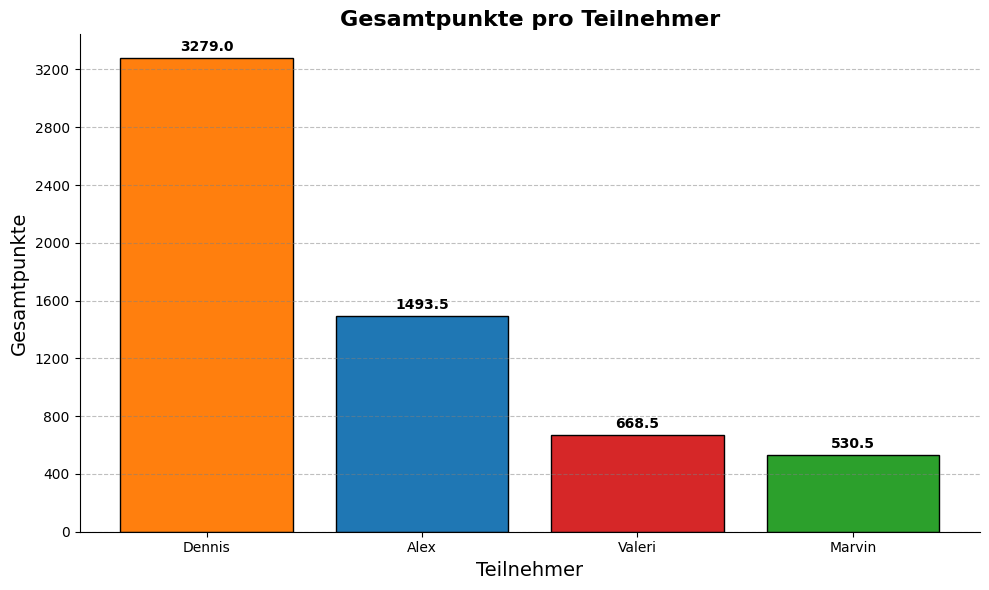

In [31]:
# 1. Definiere eine Farbe für jeden Benutzer
user_colors = {
    'Alex':   '#1f77b4',  # Blau
    'Dennis': '#ff7f0e',  # Orange
    'Marvin': '#2ca02c',  # Grün
    'Valeri': '#d62728',  # Rot
}

# 2. Aggregiere und sortiere die Daten nach Punkten in absteigender Reihenfolge
agg_df = df.groupby('name', as_index=False)['points'].sum()
agg_df = agg_df.sort_values(by='points', ascending=False)

# 3. Erstelle eine Liste von Farben basierend auf der sortierten DataFrame
colors = agg_df['name'].map(user_colors).fillna('#777777')  # Standardfarbe Grau, falls Benutzer nicht definiert

# 4. Initialisiere das Diagramm
fig, ax = plt.subplots(figsize=(10, 6))

# 5. Erstelle das Balkendiagramm mit den definierten Farben
bars = ax.bar(agg_df['name'], agg_df['points'], color=colors, edgecolor='black')

# 6. Füge Datenbeschriftungen oberhalb der Balken hinzu
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 Punkte vertikale Verschiebung
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# 7. Setze Titel und Achsenbeschriftungen auf Deutsch
ax.set_title('Gesamtpunkte pro Teilnehmer', fontsize=16, fontweight='bold')
ax.set_xlabel('Teilnehmer', fontsize=14)
ax.set_ylabel('Gesamtpunkte', fontsize=14)

# 8. Passe die y-Achse an, um ganze Zahlen darzustellen, falls Punkte ganze Zahlen sind
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# 9. Füge Gitternetzlinien für bessere Lesbarkeit hinzu
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)

# 10. Entferne die oberen und rechten Rahmen für ein saubereres Aussehen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 11. Passe das Layout an, um das Abschneiden von Labels zu verhindern
plt.tight_layout()

# 12. Zeige das Diagramm an
plt.show()

## Plot for fishes

In [32]:

# Beispiel-DatenFrame (ersetze dies durch deine tatsächlichen Daten)
agg_df = merged_df.groupby(['name', 'type'], as_index=False)['points'].sum()

# Definiere die Benutzerfarben
user_colors = {
    'Alex':   '#1f77b4',  # Blau
    'Dennis': '#ff7f0e',  # Orange
    'Marvin': '#2ca02c',  # Grün
    'Valeri': '#d62728',  # Rot
}

# Erstelle das Bubble Chart mit Plotly
fig = px.scatter(
    agg_df,
    x='name',
    y='type',
    size='points',
    color='name',
    color_discrete_map=user_colors,
    title='Anzahl der gefangenen Fische pro Benutzer und Fischart',
    labels={'name': 'Benutzer', 'type': 'Fischart', 'points': 'Anzahl der Punkte'},
    hover_name='name',
    hover_data=['type', 'points'],
)

# Passe das Layout an
fig.update_layout(
    xaxis_title='Teilnehmer',
    yaxis_title='Fischart',
    legend_title='Teilnehmer',
    title_font_size=20
)

# Zeige das interaktive Diagramm an
fig.show()